Indonesia Bagian Data:
1. Amjad Adhie
2. Iskandar Muda
3. Raka Admiharfan Fatihah

Import Library

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf


Dataset

In [63]:
train = pd.read_csv('dataset/train_features.csv')
train.insert(0, 'ID', 0)
train.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,0,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,0,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,0,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,0,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN


In [64]:
test_set = pd.read_csv('dataset/test_features.csv')
test_set.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


In [65]:
label = pd.read_csv('dataset/train_labels.csv')
label.head()

,jumlah_promosi
0,2
1,0
2,1
3,4
4,4


In [66]:
# Menggabungkan data train dan label
train_set = train.join(label)

# EDA (Exploratory Data Analysis)

In [67]:
# memeriksa setiap kolom dari data train yang kosong
train_set.isnull().sum()

ID                            0
tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
jumlah_promosi                0
dtype: int64

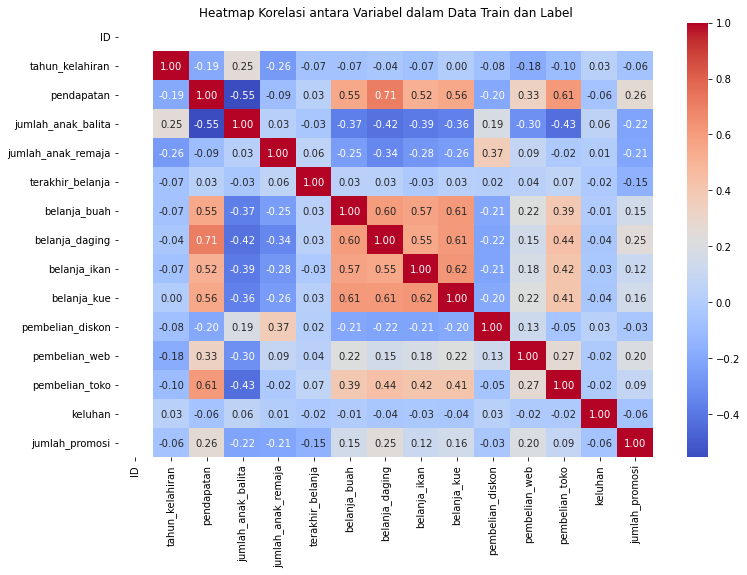

In [68]:
# Menghitung korelasi antara variabel numerik
corr = train_set.corr()

# Membuat heatmap dari korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antara Variabel dalam Data Train dan Label')
plt.show()

In [69]:
train_set.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,0,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,0,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,0,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,0,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4


## Data Preparation

### Drop Duplicate Data

In [70]:
# drop row has similar value
print("Rows before dropping duplicates:", len(train_set))
train_set.drop_duplicates(inplace=True)
print("Rows after dropping duplicates:", len(train_set))

train_set.reset_index(drop=True, inplace=True)

Rows before dropping duplicates: 3817
Rows after dropping duplicates: 3817


No duplicate rows in the training data.

In [71]:
# Drop row has all NaN value
print("Rows before dropping all NaN value:", len(train_set))
train_set.dropna(how='all', inplace=True)
print("Rows after dropping all NaN value:", len(train_set))


Rows before dropping all NaN value: 3817
Rows after dropping all NaN value: 3817


In [72]:
# Drop column tanggal_menjadi_anggota
# train_set.drop('tanggal_menjadi_anggota', axis=1, inplace=True)
# train_set.head()

In [73]:
# Drop column tanggal_menjadi_anggota pada test_set
# test_set.drop('tanggal_menjadi_anggota', axis=1, inplace=True)
test_set.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


## Split Training Set and Validation Set

In [74]:
from sklearn.model_selection import train_test_split

# Save original training set
train_set_ori = train_set.copy()

train_set.drop('tanggal_menjadi_anggota', axis=1, inplace=True)
# Split training set and validation set
train_set, val_set = train_test_split(train_set, test_size=0.2, stratify=train_set['jumlah_promosi'], random_state=42)

val_set['ID'] = val_set.reset_index().index

In [75]:
train_set.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi
2329,0,1962,Doktor,Cerai,170435626.0,0.0,0.0,29.0,62713.0,925837.0,117753.0,151245.0,1.0,4.0,12.0,0.0,3
394,0,1973,Doktor,Rencana Menikah,171014909.0,0.0,0.0,79.0,189937.0,1166661.0,164325.0,84866.0,0.0,5.0,6.0,0.0,6
981,0,1951,Sarjana,Rencana Menikah,98962000.0,0.0,1.0,36.0,26299.0,159817.0,12138.0,24276.0,5.0,6.0,6.0,1.0,1
1199,0,1966,Sarjana,Sendiri,93386407.0,0.0,1.0,38.0,10163.0,48697.0,10870.0,2632.0,4.0,NaN,4.0,0.0,5
3137,0,1959,Sarjana,Menikah,150100639.0,0.0,NaN,46.0,127193.0,307425.0,90571.0,44549.0,NaN,7.0,8.0,0.0,4


In [76]:
print(len(train_set))
print(len(val_set))

3053
764


## Preprocessing

### Handle Missing Values¶

In [77]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3053 entries, 2329 to 206
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3053 non-null   int64  
 1   tahun_kelahiran     3053 non-null   int64  
 2   pendidikan          2899 non-null   object 
 3   status_pernikahan   2879 non-null   object 
 4   pendapatan          2898 non-null   float64
 5   jumlah_anak_balita  2898 non-null   float64
 6   jumlah_anak_remaja  2904 non-null   float64
 7   terakhir_belanja    2907 non-null   float64
 8   belanja_buah        2912 non-null   float64
 9   belanja_daging      2909 non-null   float64
 10  belanja_ikan        2897 non-null   float64
 11  belanja_kue         2884 non-null   float64
 12  pembelian_diskon    2909 non-null   float64
 13  pembelian_web       2926 non-null   float64
 14  pembelian_toko      2916 non-null   float64
 15  keluhan             2887 non-null   float64
 16  juml

In [78]:
val_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 2464 to 2265
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  764 non-null    int64  
 1   tahun_kelahiran     764 non-null    int64  
 2   pendidikan          729 non-null    object 
 3   status_pernikahan   726 non-null    object 
 4   pendapatan          729 non-null    float64
 5   jumlah_anak_balita  729 non-null    float64
 6   jumlah_anak_remaja  709 non-null    float64
 7   terakhir_belanja    738 non-null    float64
 8   belanja_buah        724 non-null    float64
 9   belanja_daging      730 non-null    float64
 10  belanja_ikan        727 non-null    float64
 11  belanja_kue         719 non-null    float64
 12  pembelian_diskon    730 non-null    float64
 13  pembelian_web       726 non-null    float64
 14  pembelian_toko      732 non-null    float64
 15  keluhan             734 non-null    float64
 16  juml

In [79]:
# Split numerical and categorical variables
num_feat = train_set.select_dtypes(include=['int', 'float'])
cat_feat = train_set.select_dtypes(include=['object'])

num_feat_val = val_set.select_dtypes(include=['int', 'float'])
cat_feat_val = val_set.select_dtypes(include=['object'])

In [80]:
def feat_null_pct(num, data):
    missing = num.isnull().sum()
    nans = missing[missing > 0].sort_values(ascending=False)
    for col in nans.index:
        print(f"{col} Null Values: {round(100 - data[col].value_counts().sum()/len(data) * 100, 2)}% of the dataset ({len(data) - data[col].value_counts().sum()})")

print("Missing numerical train data: ")
feat_null_pct(num_feat, train_set)
print()
print("Missing categorical train data:")
feat_null_pct(cat_feat, train_set)

Missing numerical train data: 
belanja_kue Null Values: 5.54% of the dataset (169)
keluhan Null Values: 5.44% of the dataset (166)
belanja_ikan Null Values: 5.11% of the dataset (156)
jumlah_anak_balita Null Values: 5.08% of the dataset (155)
pendapatan Null Values: 5.08% of the dataset (155)
jumlah_anak_remaja Null Values: 4.88% of the dataset (149)
terakhir_belanja Null Values: 4.78% of the dataset (146)
pembelian_diskon Null Values: 4.72% of the dataset (144)
belanja_daging Null Values: 4.72% of the dataset (144)
belanja_buah Null Values: 4.62% of the dataset (141)
pembelian_toko Null Values: 4.49% of the dataset (137)
pembelian_web Null Values: 4.16% of the dataset (127)

Missing categorical train data:
status_pernikahan Null Values: 5.7% of the dataset (174)
pendidikan Null Values: 5.04% of the dataset (154)


In [81]:
print("Missing numerical validation data: ")
feat_null_pct(num_feat_val, val_set)
print()
print("Missing categorical validation data:")
feat_null_pct(cat_feat_val, val_set)

Missing numerical validation data: 
jumlah_anak_remaja Null Values: 7.2% of the dataset (55)
belanja_kue Null Values: 5.89% of the dataset (45)
belanja_buah Null Values: 5.24% of the dataset (40)
pembelian_web Null Values: 4.97% of the dataset (38)
belanja_ikan Null Values: 4.84% of the dataset (37)
jumlah_anak_balita Null Values: 4.58% of the dataset (35)
pendapatan Null Values: 4.58% of the dataset (35)
pembelian_diskon Null Values: 4.45% of the dataset (34)
belanja_daging Null Values: 4.45% of the dataset (34)
pembelian_toko Null Values: 4.19% of the dataset (32)
keluhan Null Values: 3.93% of the dataset (30)
terakhir_belanja Null Values: 3.4% of the dataset (26)

Missing categorical validation data:
status_pernikahan Null Values: 4.97% of the dataset (38)
pendidikan Null Values: 4.58% of the dataset (35)


In [82]:
# Create custom imputer class
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

class FeatureImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):

        # Impute pendidikan column
        self.pendidikan_imputer = SimpleImputer(strategy='most_frequent')
        self.pendidikan_imputer.fit(X[['pendidikan']])

        # Impute status_pernikahan column
        self.status_pernikahan_imputer = SimpleImputer(strategy="most_frequent")
        self.status_pernikahan_imputer.fit(X[['status_pernikahan']])

        # Impute keluhan column with modus
        self.keluhan_imputer = SimpleImputer(strategy='most_frequent')
        self.keluhan_imputer.fit(X[['keluhan']])
        
        # Impute jumlah_anak_remaja column
        self.jumlah_anak_remaja_imputer = SimpleImputer(strategy="constant", fill_value=0)
        self.jumlah_anak_remaja_imputer.fit(X[['jumlah_anak_remaja']])

        # Impute jumlah_anak_balita column
        self.jumlah_anak_balita_imputer = SimpleImputer(strategy="constant", fill_value=0)
        self.jumlah_anak_balita_imputer.fit(X[['jumlah_anak_balita']])

        # Impute belanja_kue column with median
        self.belanja_kue_imputer = SimpleImputer(strategy='median')
        self.belanja_kue_imputer.fit(X[['belanja_kue']])

        # Impute belanja_daging column with median
        self.belanja_daging_imputer = SimpleImputer(strategy='median')
        self.belanja_daging_imputer.fit(X[['belanja_daging']])

        # Impute belanja_ikan column with median
        self.belanja_ikan_imputer = SimpleImputer(strategy='median')
        self.belanja_ikan_imputer.fit(X[['belanja_ikan']])

        # Impute belanja_buah column with median
        self.belanja_buah_imputer = SimpleImputer(strategy='median')
        self.belanja_buah_imputer.fit(X[['belanja_buah']])

        # Impute pembelian_diskon column with median
        self.pembelian_diskon_imputer = SimpleImputer(strategy='median')
        self.pembelian_diskon_imputer.fit(X[['pembelian_diskon']])

        # Impute pembelian_web column with median
        self.pembelian_web_imputer = SimpleImputer(strategy='median')
        self.pembelian_web_imputer.fit(X[['pembelian_web']])

        # Impute pembelian_toko column with median
        self.pembelian_toko_imputer = SimpleImputer(strategy='median')
        self.pembelian_toko_imputer.fit(X[['pembelian_toko']])

        # Impute pendapatan column with median
        self.pendapatan_imputer = SimpleImputer(strategy='median')
        self.pendapatan_imputer.fit(X[['pendapatan']])

        # Impute terakhir_belanja column with median
        self.terakhir_belanja_imputer = SimpleImputer(strategy='median')
        self.terakhir_belanja_imputer.fit(X[['terakhir_belanja']])

        
        return self
    
    def transform(self, X):
        X_imputed = X.copy()
        # Apply imputation to the '
        X_imputed['pendidikan'] = self.pendidikan_imputer.transform(X[['pendidikan']])
        X_imputed['status_pernikahan'] = self.status_pernikahan_imputer.transform(X[['status_pernikahan']])
        X_imputed['keluhan'] = self.keluhan_imputer.transform(X[['keluhan']])
        X_imputed['jumlah_anak_remaja'] = self.jumlah_anak_remaja_imputer.transform(X[['jumlah_anak_remaja']])
        X_imputed['jumlah_anak_balita'] = self.jumlah_anak_balita_imputer.transform(X[['jumlah_anak_balita']])
        X_imputed['belanja_kue'] = self.belanja_kue_imputer.transform(X[['belanja_kue']])
        X_imputed['belanja_daging'] = self.belanja_daging_imputer.transform(X[['belanja_daging']])
        X_imputed['belanja_ikan'] = self.belanja_ikan_imputer.transform(X[['belanja_ikan']])
        X_imputed['belanja_buah'] = self.belanja_buah_imputer.transform(X[['belanja_buah']])
        X_imputed['pembelian_diskon'] = self.pembelian_diskon_imputer.transform(X[['pembelian_diskon']])
        X_imputed['pembelian_web'] = self.pembelian_web_imputer.transform(X[['pembelian_web']])
        X_imputed['pembelian_toko'] = self.pembelian_toko_imputer.transform(X[['pembelian_toko']])
        X_imputed['pendapatan'] = self.pendapatan_imputer.transform(X[['pendapatan']])
        X_imputed['terakhir_belanja'] = self.terakhir_belanja_imputer.transform(X[['terakhir_belanja']])
               
        return X_imputed

### Feature Creation¶

In [83]:
n_promosi = 7
most_freq_promosi = train_set['jumlah_promosi'].value_counts()[:n_promosi].index
train_set['jumlah_promosi'].value_counts()[:n_promosi]

0    786
5    445
1    412
4    412
3    378
2    311
6    309
Name: jumlah_promosi, dtype: int64

In [84]:
n_pendidikan = 7
most_freq_pendidikan= train_set['pendidikan'].value_counts()[:n_pendidikan].index
train_set['pendidikan'].value_counts()[:n_pendidikan]

Sarjana     1450
Magister     692
SMA          345
Doktor       338
SMP           72
5              2
Name: pendidikan, dtype: int64

In [85]:
n_pendidikan = 7
most_freq_pendidikan= test_set['pendidikan'].value_counts()[:n_pendidikan].index
test_set['pendidikan'].value_counts()[:n_pendidikan]
# 3614

Sarjana     1935
Magister     803
SMA          408
Doktor       404
SMP           62
5              2
Name: pendidikan, dtype: int64

In [86]:
len(test_set)

3818

In [87]:
# drop row where pendidikan = 5
train_set = train_set[train_set['pendidikan'] != '5']

In [88]:
n_status_pernikahan = 6
most_freq_status_pernikahan= train_set['status_pernikahan'].value_counts()[:n_status_pernikahan].index
train_set['status_pernikahan'].value_counts()[:n_status_pernikahan]
train_set = train_set[train_set['status_pernikahan'] != '5']

In [89]:
n_status_pernikahan = 6
most_freq_status_pernikahan= test_set['status_pernikahan'].value_counts()[:n_status_pernikahan].index
test_set['status_pernikahan'].value_counts()[:n_status_pernikahan]
# 3636

Rencana Menikah    1272
Menikah            1126
Sendiri             972
Cerai               206
Cerai Mati           59
5                     1
Name: status_pernikahan, dtype: int64

In [90]:
# memeriksa test set yang kolom 'pendapatan' bernilai kosong atau null
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3818 non-null   int64  
 1   tahun_kelahiran          3818 non-null   int64  
 2   pendidikan               3614 non-null   object 
 3   status_pernikahan        3636 non-null   object 
 4   pendapatan               3615 non-null   float64
 5   jumlah_anak_balita       3609 non-null   float64
 6   jumlah_anak_remaja       3608 non-null   float64
 7   terakhir_belanja         3617 non-null   float64
 8   belanja_buah             3632 non-null   float64
 9   belanja_daging           3623 non-null   float64
 10  belanja_ikan             3622 non-null   float64
 11  belanja_kue              3631 non-null   float64
 12  pembelian_diskon         3639 non-null   float64
 13  pembelian_web            3638 non-null   float64
 14  pembelian_toko          

In [91]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3050 entries, 2329 to 206
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3050 non-null   int64  
 1   tahun_kelahiran     3050 non-null   int64  
 2   pendidikan          2896 non-null   object 
 3   status_pernikahan   2876 non-null   object 
 4   pendapatan          2895 non-null   float64
 5   jumlah_anak_balita  2895 non-null   float64
 6   jumlah_anak_remaja  2901 non-null   float64
 7   terakhir_belanja    2904 non-null   float64
 8   belanja_buah        2909 non-null   float64
 9   belanja_daging      2906 non-null   float64
 10  belanja_ikan        2895 non-null   float64
 11  belanja_kue         2881 non-null   float64
 12  pembelian_diskon    2906 non-null   float64
 13  pembelian_web       2923 non-null   float64
 14  pembelian_toko      2913 non-null   float64
 15  keluhan             2884 non-null   float64
 16  juml

In [92]:
# tampilkan tabel train_set dimana kolom 'pendidikan' atau kolom 'status_pernikahan' bernilai null
train_set[train_set['pendidikan'].isnull() | train_set['status_pernikahan'].isnull()]

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi
2953,0,1971,Sarjana,NaN,152822999.0,0.0,0.0,22.0,97997.0,NaN,270045.0,1237.0,0.0,NaN,10.0,0.0,4
2292,0,1957,Sarjana,NaN,77838452.0,0.0,0.0,46.0,22074.0,94702.0,48284.0,47618.0,4.0,0.0,3.0,0.0,5
1147,0,1947,SMA,NaN,102145000.0,0.0,0.0,29.0,42483.0,475405.0,103173.0,212415.0,0.0,9.0,12.0,NaN,0
1934,0,1964,Sarjana,NaN,NaN,0.0,0.0,36.0,146082.0,775093.0,352149.0,144246.0,2.0,3.0,9.0,0.0,2
1228,0,1985,Sarjana,NaN,49859833.0,1.0,0.0,73.0,15681.0,64605.0,14111.0,12460.0,0.0,5.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,0,1961,NaN,Sendiri,152552338.0,0.0,0.0,10.0,132551.0,341139.0,151764.0,49081.0,2.0,10.0,4.0,NaN,4
339,0,1957,NaN,Rencana Menikah,NaN,0.0,1.0,31.0,18207.0,394485.0,38437.0,56644.0,5.0,8.0,12.0,0.0,6
2420,0,1966,Sarjana,NaN,148105185.0,0.0,0.0,6.0,NaN,273594.0,25092.0,3079.0,1.0,5.0,11.0,0.0,4
3234,0,1961,Magister,NaN,166508277.0,0.0,0.0,63.0,101004.0,871962.0,307265.0,35358.0,2.0,0.0,13.0,0.0,5


In [93]:
test_set

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,271,1984,Magister,Sendiri,66320000.0,1.0,0.0,19.0,12138.0,38437.0,0.0,10115.0,4.0,0.0,6.0,1.0,2014-03-17
3814,3334,1972,Sarjana,Menikah,159651946.0,0.0,0.0,90.0,32119.0,1032587.0,176078.0,78693.0,0.0,6.0,8.0,0.0,NaN
3815,3478,1968,Magister,Rencana Menikah,84058923.0,0.0,1.0,46.0,8198.0,47595.0,11392.0,10540.0,NaN,0.0,1.0,0.0,NaN
3816,89,1966,Sarjana,Rencana Menikah,106301000.0,0.0,1.0,74.0,16184.0,78897.0,NaN,0.0,3.0,5.0,3.0,0.0,2014-01-20


In [94]:
# drop row where status_pernikahan = 5
train_set = train_set[train_set['status_pernikahan'] != '5']

### Encode Categorical Features

In [95]:
# Create custom encoder class
class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_encoded = X.copy()
        
        cat_cols = X.select_dtypes(include=['object'])
        
        for col in cat_cols:
            
            # Perform one-hot encoding
            X_encoded = pd.concat([X_encoded, pd.get_dummies(X_encoded[col], prefix=col)], axis=1)

            # Drop original categorical columns from DataFrame
            X_encoded.drop(col, axis=1, inplace=True)
        
        return X_encoded

### Remove Outliers¶
This step is to remove outliers based on a column using the IQR method.

In [96]:
# Outlier remover
def remove_outlier(data, col):
    # Determine IQR for column
    col_values = data[col].values
    q25, q75 = np.percentile(col_values, 25), np.percentile(col_values, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75 - q25
    print('IQR: {}'.format(iqr))
    print()

    # Determine the cut off (IQR * 1.5)
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Cut Off: {}'.format(cut_off))
    print('Lower bound: {}'.format(lower))
    print('Upper bound: {}'.format(upper))
    print()

    # Examine instances before removal
    print("Number of instances before removal: {}".format(len(data)))

    # Remove outliers
    data = data.drop(data[(data[col] > upper) | (data[col] < lower)].index)

    # Examine instances after removal
    print("Number of instances after removal: {}".format(len(data)))
    print()

    return data

In [97]:
def count_outliers(df):
    outliers_count = {}
    
    # Loop through each column in the DataFrame
    for column in df.columns:
        # Calculate the first quartile (Q1)
        Q1 = df[column].quantile(0.25)
        
        # Calculate the third quartile (Q3)
        Q3 = df[column].quantile(0.75)
        
        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1
        
        # Define the lower bound for outliers
        lower_bound = Q1 - 1.5 * IQR
        
        # Define the upper bound for outliers
        upper_bound = Q3 + 1.5 * IQR
        
        # Count the number of outliers for the current column
        outliers_count[column] = np.sum((df[column] < lower_bound) | (df[column] > upper_bound))
    
    return outliers_count

# Contoh penggunaan
# outliers_count = count_outliers(train_set)
# print(outliers_count)

### Handle Imbalances

In [98]:
# Plot class distribution
def plot_classes(y):
    plt.title("Class distribution")
    plt.pie(x=y.value_counts(), autopct='%.2f', labels=y.value_counts().index)
    
    print(y.value_counts())
    print()

Sarjana     1450
Magister     692
SMA          345
Doktor       337
SMP           72
Name: pendidikan, dtype: int64



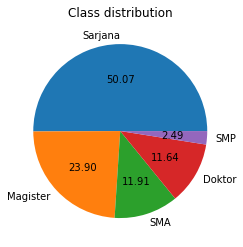

In [99]:
plot_classes(train_set['pendidikan'])

In [100]:
from imblearn.over_sampling import SMOTE

def balance_classes(X_t, y_t):
    sm = SMOTE(random_state=42)
    X_t_res, y_t_res = sm.fit_resample(X_t, y_t)
    return X_t_res, y_t_res

## Prepare Training and Validation set
All of the preprocessing steps will be compiled in this section.

### Fitting the Pipeline¶
We will pass down the training and validation set through a pipeline that performs the preprocessing steps defined before.

In [101]:
from sklearn.pipeline import Pipeline

pipeline_val = Pipeline([("imputer", FeatureImputer()),
                    ("encoder", FeatureEncoder())])


In [102]:
train_set = pipeline_val.fit_transform(train_set)
val_set = pipeline_val.transform(val_set)
testing_set = pipeline_val.transform(test_set)

In [103]:
outliers_count = count_outliers(train_set)
print(outliers_count)
remove_outlier(train_set, 'tahun_kelahiran')

{'ID': 0, 'tahun_kelahiran': 15, 'pendapatan': 8, 'jumlah_anak_balita': 0, 'jumlah_anak_remaja': 0, 'terakhir_belanja': 0, 'belanja_buah': 227, 'belanja_daging': 137, 'belanja_ikan': 198, 'belanja_kue': 227, 'pembelian_diskon': 117, 'pembelian_web': 17, 'pembelian_toko': 9, 'keluhan': 17, 'jumlah_promosi': 0, 'pendidikan_Doktor': 337, 'pendidikan_Magister': 692, 'pendidikan_SMA': 345, 'pendidikan_SMP': 72, 'pendidikan_Sarjana': 0, 'status_pernikahan_Cerai': 175, 'status_pernikahan_Cerai Mati': 31, 'status_pernikahan_Menikah': 0, 'status_pernikahan_Rencana Menikah': 0, 'status_pernikahan_Sendiri': 744}
Quartile 25: 1959.0 | Quartile 75: 1976.0
IQR: 17.0

Cut Off: 25.5
Lower bound: 1933.5
Upper bound: 2001.5

Number of instances before removal: 3050
Number of instances after removal: 3035



,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
2329,0,1962,170435626.0,0.0,0.0,29.0,62713.0,925837.0,117753.0,151245.0,...,1,0,0,0,0,1,0,0,0,0
394,0,1973,171014909.0,0.0,0.0,79.0,189937.0,1166661.0,164325.0,84866.0,...,1,0,0,0,0,0,0,0,1,0
981,0,1951,98962000.0,0.0,1.0,36.0,26299.0,159817.0,12138.0,24276.0,...,0,0,0,0,1,0,0,0,1,0
1199,0,1966,93386407.0,0.0,1.0,38.0,10163.0,48697.0,10870.0,2632.0,...,0,0,0,0,1,0,0,0,0,1
3137,0,1959,150100639.0,0.0,0.0,46.0,127193.0,307425.0,90571.0,44549.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,0,1966,117173937.0,0.0,1.0,69.0,2229.0,95836.0,413.0,7147.0,...,0,1,0,0,0,0,0,0,1,0
1368,0,1951,134341710.0,0.0,0.0,27.0,100313.0,352545.0,28200.0,50102.0,...,0,0,1,0,0,0,0,1,0,0
2321,0,1974,155602000.0,1.0,0.0,0.0,216461.0,621061.0,285243.0,167909.0,...,0,0,0,0,1,0,0,1,0,0
3547,0,1972,117173937.0,0.0,1.0,19.0,76874.0,228599.0,97104.0,62713.0,...,0,0,0,0,1,0,0,0,1,0


In [104]:
print(len(train_set))

3050


In [105]:
val_set.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
2464,0,1957,33742926.0,0.0,0.0,79.0,8109.0,25610.0,8792.0,5398.0,...,0,0,0,0,1,0,0,0,0,1
480,1,1976,140988476.0,0.0,0.0,45.0,102826.0,804331.0,52446.0,44966.0,...,0,0,0,0,1,0,0,0,1,0
2368,2,1979,29604689.0,1.0,0.0,57.0,0.0,6331.0,16100.0,12090.0,...,0,0,0,0,1,0,0,0,1,0
3457,3,1977,118810462.0,0.0,1.0,60.0,30193.0,172971.0,85239.0,72449.0,...,0,0,0,0,1,0,0,0,1,0
503,4,1972,129913133.0,0.0,0.0,49.0,30597.0,551015.0,29839.0,49816.0,...,0,0,0,0,1,0,0,0,0,1


In [106]:
print(len(val_set))

764


In [107]:
null_test = val_set.columns[val_set.isnull().any()]
print(val_set[null_test].isnull().sum())

Series([], dtype: float64)


### Matching the Train and Validation Columns¶
Columns need to be matched between the train and validation set as there may be columns that exists in the validation set but not in the training set, and vice versa.

In [108]:
def match_columns(train, test):
    # Get list of columns in training set
    train_cols = train.columns.tolist()
    
    # Get list of columns in test set
    test_cols = test.columns.tolist()
    
    # Remove any columns in test set that aren't in training set
    for col in test_cols:
        if col not in train_cols:
            test = test.drop(col, axis=1)
    
    # Add any missing columns to test set and fill with 0
    for col in train_cols:
        if col not in test_cols:
            test[col] = 0
    
    # Reorder columns in test set to match training set
    test = test[train_cols]
    
    # Return modified test set
    return test

In [109]:
train_set.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
2329,0,1962,170435626.0,0.0,0.0,29.0,62713.0,925837.0,117753.0,151245.0,...,1,0,0,0,0,1,0,0,0,0
394,0,1973,171014909.0,0.0,0.0,79.0,189937.0,1166661.0,164325.0,84866.0,...,1,0,0,0,0,0,0,0,1,0
981,0,1951,98962000.0,0.0,1.0,36.0,26299.0,159817.0,12138.0,24276.0,...,0,0,0,0,1,0,0,0,1,0
1199,0,1966,93386407.0,0.0,1.0,38.0,10163.0,48697.0,10870.0,2632.0,...,0,0,0,0,1,0,0,0,0,1
3137,0,1959,150100639.0,0.0,0.0,46.0,127193.0,307425.0,90571.0,44549.0,...,0,0,0,0,1,0,0,1,0,0


In [110]:
val_set.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
2464,0,1957,33742926.0,0.0,0.0,79.0,8109.0,25610.0,8792.0,5398.0,...,0,0,0,0,1,0,0,0,0,1
480,1,1976,140988476.0,0.0,0.0,45.0,102826.0,804331.0,52446.0,44966.0,...,0,0,0,0,1,0,0,0,1,0
2368,2,1979,29604689.0,1.0,0.0,57.0,0.0,6331.0,16100.0,12090.0,...,0,0,0,0,1,0,0,0,1,0
3457,3,1977,118810462.0,0.0,1.0,60.0,30193.0,172971.0,85239.0,72449.0,...,0,0,0,0,1,0,0,0,1,0
503,4,1972,129913133.0,0.0,0.0,49.0,30597.0,551015.0,29839.0,49816.0,...,0,0,0,0,1,0,0,0,0,1


Below, we examine each column's correlation to the target variable after preprocessing.

In [111]:
train_set.corr()['jumlah_promosi'].sort_values(ascending=False)


jumlah_promosi                       1.000000
pendapatan                           0.253584
belanja_daging                       0.238128
pembelian_web                        0.190209
belanja_kue                          0.142009
belanja_buah                         0.140980
belanja_ikan                         0.103910
pendidikan_Magister                  0.094548
pembelian_toko                       0.083992
status_pernikahan_Rencana Menikah    0.076795
pendidikan_Sarjana                   0.064384
status_pernikahan_Sendiri            0.048017
pembelian_diskon                    -0.029109
status_pernikahan_Cerai Mati        -0.033053
status_pernikahan_Cerai             -0.055020
tahun_kelahiran                     -0.068279
keluhan                             -0.075472
pendidikan_SMA                      -0.078361
status_pernikahan_Menikah           -0.092104
pendidikan_Doktor                   -0.097732
pendidikan_SMP                      -0.107287
terakhir_belanja                  

### Apply Resampling
Oversampling the data as explained before.

In [112]:
# Split predictor and target variable
X_train = train_set.drop(['jumlah_promosi'], axis=1)
y_train = train_set['jumlah_promosi']

In [113]:
# Perform resampling
X_train, y_train = balance_classes(X_train, y_train)

3    783
6    783
2    783
5    783
1    783
4    783
0    783
Name: jumlah_promosi, dtype: int64



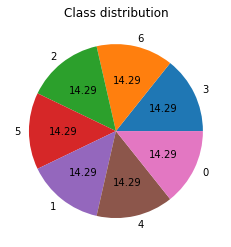

In [114]:
# Plot class distribution after resampling
plot_classes(y_train)

In [115]:
# Split predictor and target variable for validation set
X_val = val_set.drop(['jumlah_promosi'], axis=1)
y_val = val_set['jumlah_promosi']

In [116]:
X_train.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
0,0,1962,170435626.0,0.0,0.0,29.0,62713.0,925837.0,117753.0,151245.0,...,1,0,0,0,0,1,0,0,0,0
1,0,1973,171014909.0,0.0,0.0,79.0,189937.0,1166661.0,164325.0,84866.0,...,1,0,0,0,0,0,0,0,1,0
2,0,1951,98962000.0,0.0,1.0,36.0,26299.0,159817.0,12138.0,24276.0,...,0,0,0,0,1,0,0,0,1,0
3,0,1966,93386407.0,0.0,1.0,38.0,10163.0,48697.0,10870.0,2632.0,...,0,0,0,0,1,0,0,0,0,1
4,0,1959,150100639.0,0.0,0.0,46.0,127193.0,307425.0,90571.0,44549.0,...,0,0,0,0,1,0,0,1,0,0


In [117]:
X_val.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
2464,0,1957,33742926.0,0.0,0.0,79.0,8109.0,25610.0,8792.0,5398.0,...,0,0,0,0,1,0,0,0,0,1
480,1,1976,140988476.0,0.0,0.0,45.0,102826.0,804331.0,52446.0,44966.0,...,0,0,0,0,1,0,0,0,1,0
2368,2,1979,29604689.0,1.0,0.0,57.0,0.0,6331.0,16100.0,12090.0,...,0,0,0,0,1,0,0,0,1,0
3457,3,1977,118810462.0,0.0,1.0,60.0,30193.0,172971.0,85239.0,72449.0,...,0,0,0,0,1,0,0,0,1,0
503,4,1972,129913133.0,0.0,0.0,49.0,30597.0,551015.0,29839.0,49816.0,...,0,0,0,0,1,0,0,0,0,1


### Implement Classifiers¶
In this section, we will implement classifiers to train on.

In [118]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

def train_clf(X_train, y_train, **kwargs):
    rfc = RandomForestClassifier(random_state=42, n_jobs=-1, **kwargs)
    xgb = XGBClassifier(random_state=42)
    catboost = CatBoostClassifier(random_state=42, verbose=0)
    lgbm = LGBMClassifier(random_state=42)

    # Create the StackingClassifier with a Logistic Regression final estimator
    stacked_classifier = StackingClassifier(
        estimators=[
            ('rf', rfc),
            ('xgb', xgb),
            ('catboost', catboost),
            ('lgbm', lgbm)
        ],
        final_estimator=LogisticRegression(),
        cv=5,  # Number of cross-validation folds
        n_jobs=-1
    )
    
    stacked_classifier.fit(X_train, y_train)

    return stacked_classifier

I have experimented with different classifiers, including Random Forest, XGBoost, CatBoost, and Ensemble Methods. Based on my previous trials, the Stacking model has shown the best performance across all scoring metrics. Therefore, we will focus solely on building and tuning the Stacking model for the remainder of this project to save time and computational resources.

### Evaluation¶
In this section, we will evaluate the performance of our classifier on the training and validation set.

### Training Set Score

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

params = {'class_weight': 'balanced'}
clf = train_clf(X_train, y_train, **params)
y_pred_train_clf = clf.predict(X_train)

In [120]:
from sklearn.metrics import classification_report

print(f"{clf.__class__.__name__} Training Set Score")
print()
print(classification_report(y_pred_train_clf, y_train))

StackingClassifier Training Set Score

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       783
           2       1.00      1.00      1.00       783
           3       1.00      1.00      1.00       783
           4       1.00      1.00      1.00       783
           5       1.00      1.00      1.00       783
           6       1.00      1.00      1.00       783

    accuracy                           1.00      5481
   macro avg       1.00      1.00      1.00      5481
weighted avg       1.00      1.00      1.00      5481



### Validation Set Score¶

In [121]:
y_pred_val_clf = clf.predict(X_val)
y_pred_val_clf

array([0, 0, 3, 3, 5, 4, 2, 1, 0, 0, 0, 4, 6, 3, 0, 3, 2, 2, 2, 5, 0, 0,
       0, 2, 5, 3, 3, 0, 2, 3, 6, 5, 5, 3, 4, 0, 1, 6, 4, 5, 3, 6, 1, 2,
       0, 0, 5, 5, 0, 3, 5, 0, 3, 6, 6, 4, 1, 5, 4, 3, 6, 6, 6, 3, 4, 2,
       5, 1, 3, 0, 1, 4, 5, 0, 0, 0, 6, 0, 0, 5, 2, 4, 5, 0, 0, 3, 6, 0,
       5, 0, 5, 1, 3, 5, 3, 2, 2, 0, 1, 3, 0, 6, 0, 2, 0, 0, 5, 0, 0, 1,
       0, 2, 1, 3, 2, 5, 3, 4, 0, 4, 1, 1, 4, 3, 6, 1, 0, 4, 5, 0, 5, 0,
       0, 2, 0, 6, 0, 6, 0, 0, 1, 0, 0, 0, 0, 6, 4, 3, 3, 5, 5, 3, 0, 1,
       3, 0, 4, 3, 2, 6, 6, 4, 5, 0, 0, 5, 0, 1, 5, 4, 0, 5, 2, 4, 4, 1,
       0, 6, 0, 3, 5, 3, 1, 0, 1, 0, 1, 1, 4, 0, 0, 0, 6, 2, 1, 5, 0, 2,
       3, 0, 6, 4, 5, 4, 6, 1, 0, 5, 2, 1, 6, 0, 6, 5, 6, 0, 0, 5, 1, 0,
       6, 3, 1, 5, 1, 4, 0, 6, 6, 2, 1, 0, 4, 5, 2, 1, 2, 0, 1, 0, 0, 1,
       3, 0, 0, 3, 0, 5, 4, 4, 5, 5, 5, 0, 4, 4, 5, 4, 0, 4, 4, 5, 5, 4,
       5, 0, 1, 3, 0, 0, 4, 4, 0, 3, 0, 4, 4, 0, 3, 5, 3, 2, 2, 3, 5, 0,
       0, 2, 4, 0, 6, 3, 5, 4, 0, 0, 0, 3, 1, 0, 3,

In [122]:
print(f"{clf.__class__.__name__} Validation Set Score")
print()
print(classification_report(y_val, y_pred_val_clf))

StackingClassifier Validation Set Score

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       197
           1       0.56      0.43      0.49       103
           2       0.70      0.63      0.66        78
           3       0.91      0.90      0.91        94
           4       0.93      0.86      0.89       103
           5       0.91      0.92      0.92       112
           6       0.84      0.73      0.78        77

    accuracy                           0.76       764
   macro avg       0.78      0.75      0.76       764
weighted avg       0.76      0.76      0.76       764



### ROC Curve¶

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_ovr_roc_curve(y_true, y_prob):
    n_classes = y_prob.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Compute macro-average ROC curve
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Plot ROC curves
    plt.figure()
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                                       ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('One-versus-Rest ROC curve')
    plt.legend(loc="lower right")
    plt.show()

In [124]:
# Predict probabilities for test set
y_prob = clf.predict_proba(X_val)

# Get true labels for test set
n_samples = y_prob.shape[0]
n_classes = clf.classes_.shape[0]
y_true = np.zeros((n_samples, n_classes))
for i in range(n_samples):
    true_label = y_val.values[i]
    y_true[i, true_label] = 1

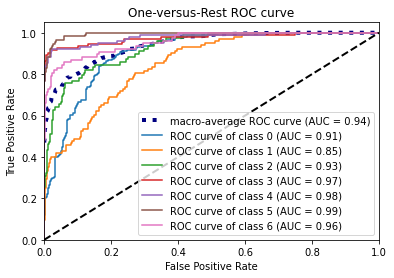

In [125]:
plot_ovr_roc_curve(y_true, y_prob)

### Prepare the Full Training Set¶
In this section, we will pass down the whole training set through the preprocessing pipeline and training the models on the entire resampled training set.

In [126]:
# Create new pipeline object to fit on the original training set
pipeline_c = Pipeline([("imputer", FeatureImputer()),
                    ("encoder", FeatureEncoder())])

pipeline_r = Pipeline([("imputer", FeatureImputer()),
                    ("encoder", FeatureEncoder())])

### Final Strategy¶
We will preprocess the dataset separately for each hotel types. The machine learning model will also be trained on each of the segregated dataset.

In [127]:
len(test_set)

3818

In [130]:
# kucing 1
# Retrieve original training set
# Split based on 'pendidikan' that has ['SMA', 'SMP', 'Sarjana', 'Magister', 'Doctor']

final_train = train_set_ori

# Split training set based on 'pendidikan'
train_sma = final_train[final_train['pendidikan'] == 'SMA']
train_smp = final_train[final_train['pendidikan'] == 'SMP']
train_sarjana = final_train[final_train['pendidikan'] == 'Sarjana']
train_magister = final_train[final_train['pendidikan'] == 'Magister']
train_doktor = final_train[final_train['pendidikan'] == 'Doktor']

train_all = final_train

test_sma = test_set[test_set['pendidikan'] == 'SMA']
test_smp = test_set[test_set['pendidikan'] == 'SMP']
test_sarjana = test_set[test_set['pendidikan'] == 'Sarjana']
test_magister = test_set[test_set['pendidikan'] == 'Magister']
test_doktor = test_set[test_set['pendidikan'] == 'Doktor']

test_all = test_set
test_val = val_set

# Fit pipeline on each training set
train_sma = pipeline_c.fit_transform(train_sma)
train_smp = pipeline_c.fit_transform(train_smp)
train_sarjana = pipeline_c.fit_transform(train_sarjana)
train_magister = pipeline_c.fit_transform(train_magister)
train_doktor = pipeline_c.fit_transform(train_doktor)

train_all = pipeline_c.fit_transform(train_all)

# Fit pipeline on test set
test_sma = pipeline_c.fit_transform(test_sma)
test_smp = pipeline_r.fit_transform(test_smp)
test_sarjana = pipeline_r.fit_transform(test_sarjana)
test_magister = pipeline_r.fit_transform(test_magister)
test_doktor = pipeline_r.fit_transform(test_doktor)

test_all = pipeline_r.fit_transform(test_all)
# test_val = pipeline_r.fit_transform(test_val)

# match the column
train_sma = match_columns(train_set, train_sma)
train_smp = match_columns(train_set, train_smp)
train_sarjana = match_columns(train_set, train_sarjana)
train_magister = match_columns(train_set, train_magister)
train_doktor = match_columns(train_set, train_doktor)

train_all = match_columns(train_set, train_all)

# match the column on test
test_sma = match_columns(train_set, test_sma)
test_smp = match_columns(train_set, test_smp)
test_sarjana = match_columns(train_set, test_sarjana)
test_magister = match_columns(train_set, test_magister)
test_doktor = match_columns(train_set, test_doktor)

test_all = match_columns(train_set, test_all)
test_val = match_columns(train_set, test_val)

# # Drop target variable from each training set
# train_sma.drop('jumlah_promosi', axis=1, inplace=True)
# train_smp.drop('jumlah_promosi', axis=1, inplace=True)
# train_sarjana.drop('jumlah_promosi', axis=1, inplace=True)
# train_magister.drop('jumlah_promosi', axis=1, inplace=True)
# train_doktor.drop('jumlah_promosi', axis=1, inplace=True)

# # Drop target variable from each test set
# test_sma.drop('jumlah_promosi', axis=1, inplace=True)
# test_smp.drop('jumlah_promosi', axis=1, inplace=True)
# test_sarjana.drop('jumlah_promosi', axis=1, inplace=True)
# test_magister.drop('jumlah_promosi', axis=1, inplace=True)
# test_doktor.drop('jumlah_promosi', axis=1, inplace=True)

# Split predictor and target variable
X_train_sma = train_sma.drop(['jumlah_promosi'], axis=1)
y_train_sma = train_sma['jumlah_promosi']

X_train_smp = train_smp.drop(['jumlah_promosi'], axis=1)
y_train_smp = train_smp['jumlah_promosi']

X_train_sarjana = train_sarjana.drop(['jumlah_promosi'], axis=1)
y_train_sarjana = train_sarjana['jumlah_promosi']

X_train_magister = train_magister.drop(['jumlah_promosi'], axis=1)
y_train_magister = train_magister['jumlah_promosi']

X_train_doktor = train_doktor.drop(['jumlah_promosi'], axis=1)
y_train_doktor = train_doktor['jumlah_promosi']

X_train_all = train_all.drop(['jumlah_promosi'], axis = 1)
y_train_all = train_all['jumlah_promosi']


In [131]:
len(test_sma) + len(test_smp) + len(test_sarjana) + len(test_magister) + len(test_doktor)

3612

In [132]:
train_sma['jumlah_promosi']

11      1
19      3
23      6
34      0
36      1
       ..
3784    3
3795    5
3810    0
3811    5
3815    0
Name: jumlah_promosi, Length: 435, dtype: int64

In [133]:
y_train_sma.head()

11    1
19    3
23    6
34    0
36    1
Name: jumlah_promosi, dtype: int64

In [134]:
# y_train_sma['jumlah_promosi']

In [135]:
X_train_smp.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
13,0,1979,14967000.0,0.0,0.0,65.0,34391.0,30345.0,32368.0,0.0,...,0,0,0,1,0,0,0,1,0,0
51,0,1975,51622455.0,1.0,0.0,28.0,12079.0,25316.0,39202.0,19935.0,...,0,0,0,1,0,0,0,0,0,1
124,0,1979,53711000.0,1.0,0.0,27.0,18207.0,18207.0,28322.0,22253.0,...,0,0,0,1,0,0,0,0,1,0
167,0,1970,28403856.0,0.0,0.0,30.0,9353.0,25537.0,30789.0,17214.0,...,0,0,0,1,0,0,0,1,0,0
177,0,1973,32094051.0,1.0,0.0,67.0,3061.0,8026.0,37409.0,94950.0,...,0,0,0,1,0,0,0,1,0,0


In [136]:
train_sma['jumlah_promosi']

11      1
19      3
23      6
34      0
36      1
       ..
3784    3
3795    5
3810    0
3811    5
3815    0
Name: jumlah_promosi, Length: 435, dtype: int64

In [137]:
# y_train_sma['jumlah_promosi']

In [138]:
# Handle imbalances
X_train_sma, y_train_sma = balance_classes(X_train_sma, y_train_sma)
X_train_smp, y_train_smp = balance_classes(X_train_smp, y_train_smp)
X_train_sarjana, y_train_sarjana = balance_classes(X_train_sarjana, y_train_sarjana)
X_train_magister, y_train_magister = balance_classes(X_train_magister, y_train_magister)
X_train_doktor, y_train_doktor = balance_classes(X_train_doktor, y_train_doktor)

X_train_all, y_train_all = balance_classes(X_train_all , y_train_all)


In [139]:
# y_train_sma['jumlah_promosi']

### Cross Validation¶
In this section, we will perform a 5-fold cross validation on the training set.

In [140]:
from sklearn.model_selection import StratifiedKFold

def evaluate_model(train_func, X, y, average, **params):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    acc = 0
    prec = 0
    rec = 0
    f1 = 0
    
    for i, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Apply resampling
        X_train_res, y_train_res = balance_classes(X_train, y_train)
        
        # Train and predict on the test data
        clf = train_func(X_train_res, y_train_res, **params)
        y_pred = clf.predict(X_test)
        print(f"Fold {i+1}")
        print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
        print(f"Precision: {precision_score(y_test, y_pred, average=average)}")
        print(f"Recall: {recall_score(y_test, y_pred, average=average)}")
        print(f"F1-score: {f1_score(y_test, y_pred, average=average)}")
        print()
        
        acc += accuracy_score(y_test, y_pred)
        prec += precision_score(y_test, y_pred, average=average)
        rec += recall_score(y_test, y_pred, average=average)
        f1 += f1_score(y_test, y_pred, average=average)
    
    print("Averages")
    print(f"Accuracy: {acc / 5}")
    print(f"Precision: {prec / 5}")
    print(f"Recall: {rec / 5}")
    print(f"F1-score: {f1 / 5}")
    print()
    

In [141]:
evaluate_model(train_clf, X_train.values, y_train.values, 'macro', **{'class_weight': 'balanced'})

Fold 1
Accuracy: 0.853236098450319
Precision: 0.8515955827641195
Recall: 0.853182380252444
F1-score: 0.8519273730870619

Fold 2
Accuracy: 0.843065693430657
Precision: 0.846998635218488
Recall: 0.8431032873708032
F1-score: 0.8443817378326341

Fold 3
Accuracy: 0.8622262773722628
Precision: 0.8672838335617774
Recall: 0.8621999020088192
F1-score: 0.8636826810466295

Fold 4
Accuracy: 0.8567518248175182
Precision: 0.860147545996175
Recall: 0.8569037119992535
F1-score: 0.8581246126939767

Fold 5
Accuracy: 0.8686131386861314
Precision: 0.8694262650474621
Recall: 0.8685284991017477
F1-score: 0.8684210540533256

Averages
Accuracy: 0.8567786065513777
Precision: 0.8590903725176045
Recall: 0.8567835561466136
F1-score: 0.8573074917427256



Cross Validation is done out of this notebook as it is computationally expensive with the current model.

Based on the provided performance metrics for a cross-validation on the model, the average accuracy achieved is 0.8544. Meanwhile the average precision and recall scores achieved were 0.856 and 0.85, respectively, while the average F1-score is 0.85. These metrics suggest that the model is performing reasonably well, but there may be room for improvement.

## Train Classifier on Each Training Set¶
Fitting the base classifier to the training set for both city and resort hotel types.

In [142]:
# Train Classifier
params = {'class_weight': 'balanced'}
clf_smp = train_clf(X_train_smp, y_train_smp, **params)
clf_sarjana = train_clf(X_train_sarjana, y_train_sarjana, **params)
clf_magister = train_clf(X_train_magister, y_train_magister, **params)
clf_doktor = train_clf(X_train_doktor, y_train_doktor, **params)
clf_sma = train_clf(X_train_sma, y_train_sma, **params)

clf_all = train_clf(X_train_all, y_train_all, **params)


In [ ]:
params = {'class_weight': 'balanced'}
train_clf(X_train_smp, y_train_smp, **params)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, g...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [ ]:
clf_sarjana

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, g...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

### Analyze Feature Importance¶
In this section, we will analyze feature importance for the trained classifier.

In [ ]:
def plot_feature_importance(importance, names, model_type):
    # Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    # Create a DataFrame using a dictionary
    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)
    
    # Sort the DataFrame in descending order of feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    # Select the top ten most significant features
    fi_df = fi_df.head(10)
    
    # Define plot style
    sns.set(style="whitegrid")

    # Plot feature importance
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=fi_df.feature_importance, y=fi_df.feature_names, palette="rocket")
    plt.title(f"{model_type} Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

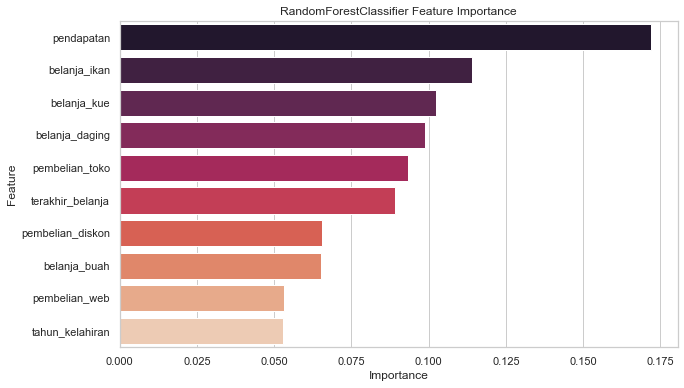

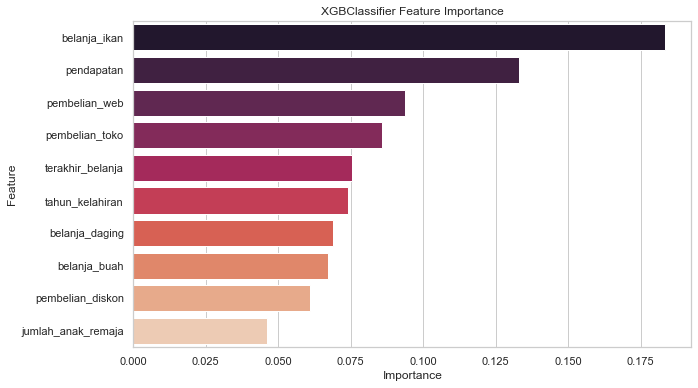

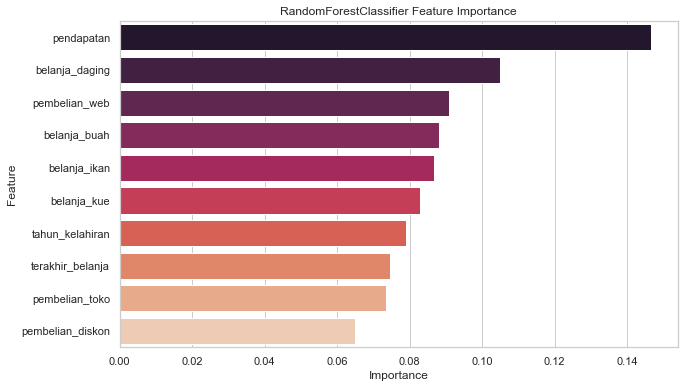

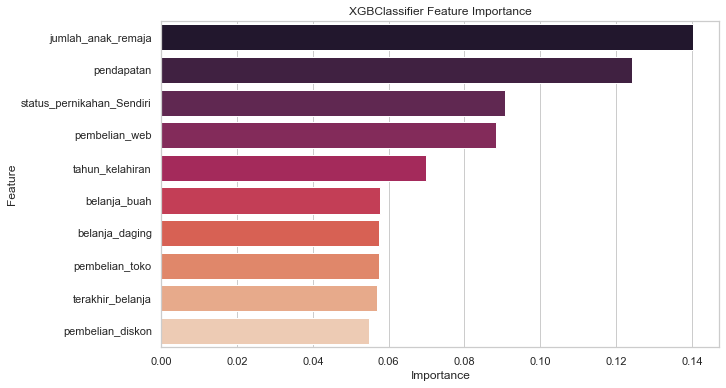

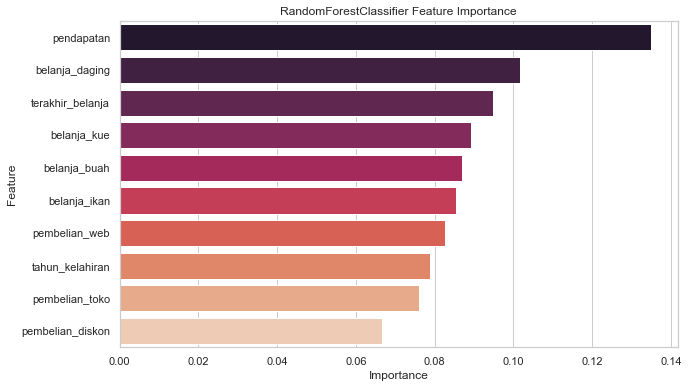

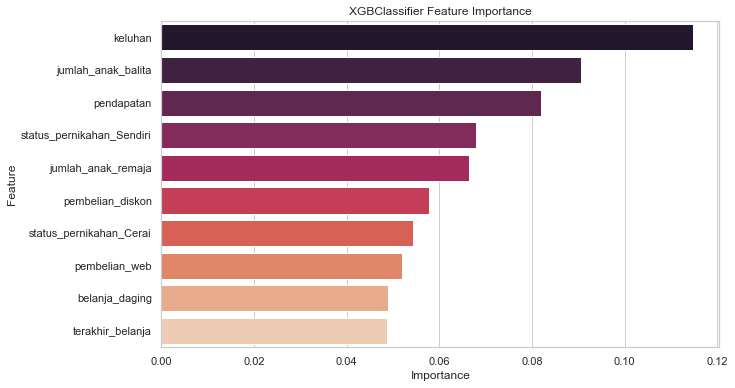

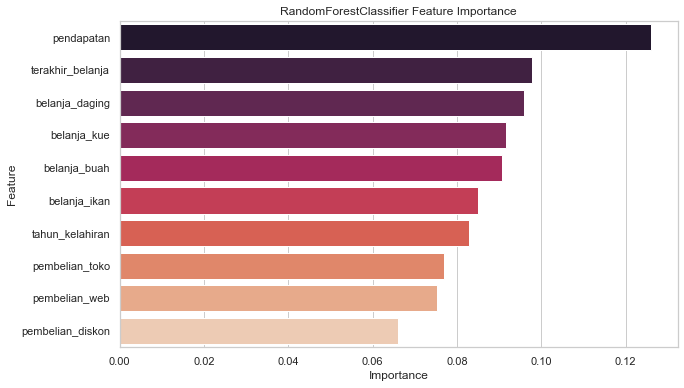

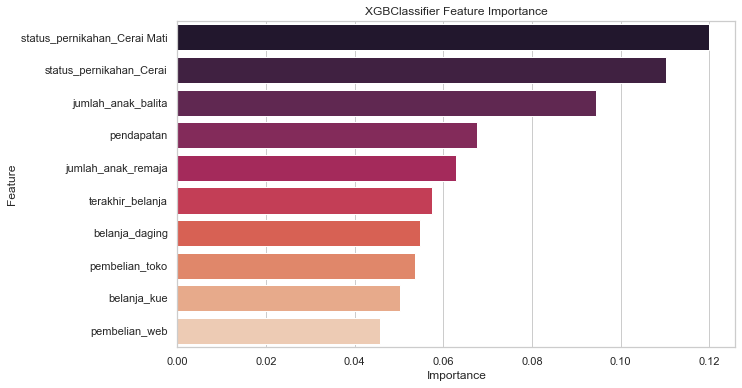

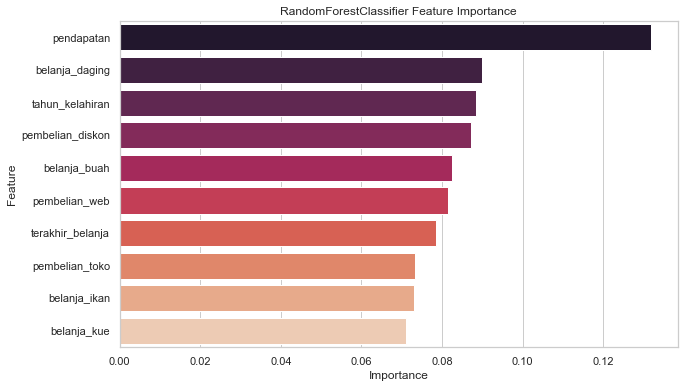

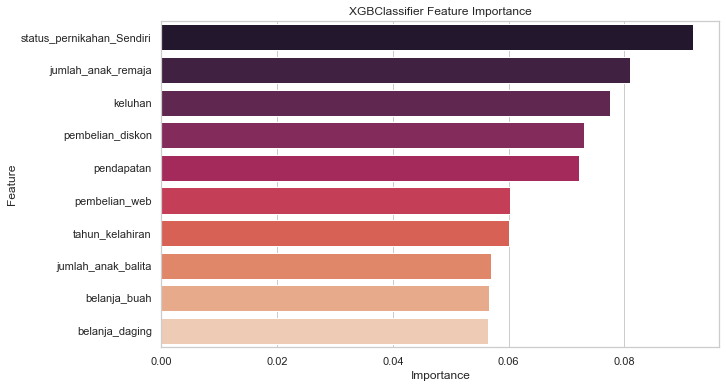

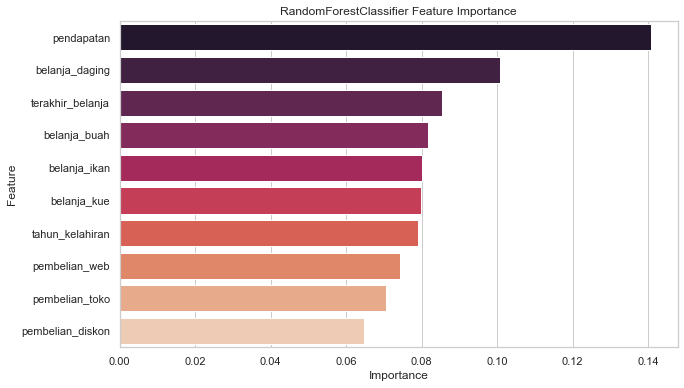

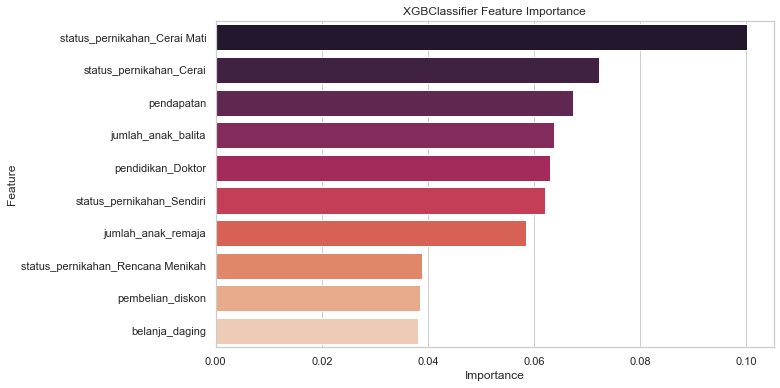

In [ ]:
for est in clf_smp.estimators_:
    plot_feature_importance(est.feature_importances_, X_train_smp.columns, est.__class__.__name__)
    
for est in clf_sma.estimators_:
    plot_feature_importance(est.feature_importances_, X_train_sma.columns, est.__class__.__name__)

for est in clf_sarjana.estimators_:
    plot_feature_importance(est.feature_importances_, X_train_sarjana.columns, est.__class__.__name__)

for est in clf_magister.estimators_:
    plot_feature_importance(est.feature_importances_, X_train_magister.columns, est.__class__.__name__)

for est in clf_doktor.estimators_:
    plot_feature_importance(est.feature_importances_, X_train_doktor.columns, est.__class__.__name__)

for est in clf_all.estimators_:
    plot_feature_importance(est.feature_importances_, X_train_all.columns, est.__class__.__name__)



### Hyperparameter Tuning with TPE Optuna¶
In this section, we will tune the selected classifier with a Bayesian Optimization Tree-structured Parzen Estimator (TPE) algorithm provided by Optuna.

In [ ]:
def cross_val_oversample_score(clf, X, y):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1 = 0
    ctr = 0
    
    for i, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Apply resampling
        X_train_res, y_train_res = balance_classes(X_train, y_train)
        
        # Train and predict on the test data
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"Fold {i+1}")
        print(f"F1-score: {f1_score(y_test, y_pred, average='macro')}")
        print()
        
        f1 += f1_score(y_test, y_pred, average='macro')
        ctr += 1
        
        if (f1_score(y_test, y_pred, average='macro') < 0.65):
            break
    
    print(f"Average: {f1 / ctr}")
    print()
    
    return f1 / ctr

In [ ]:
import optuna

# Define objective function to be maximized
def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 100, 300, step=50)
    max_depth = trial.suggest_int('max_depth', 5, 20, step=5)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    class_weight = trial.suggest_categorical('class_weight', ['balanced'])
    n_jobs = -1
    random_state = 42
    
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                  min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                  max_features=max_features, n_jobs=n_jobs, random_state=random_state, class_weight='balanced')
    
    mean_cv_score = cross_val_oversample_score(clf, X_train.values, y_train.values)
    return mean_cv_score

C:\Users\amjad\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Create an Optuna study object and optimize the hyperparameters

# study = optuna.create_study(direction='maximize', study_name='clf_study')
# study.optimize(objective, n_trials=20)

# # Print the best set of hyperparameters found
# print('Best hyperparameters:', study.best_params)

In [ ]:
# Train a model with the best hyperparameters and evaluate its performance on the test data

# best_clf = train_clf(X_train_smp, y_train_smp, **study.best_params)

In [ ]:
test_sarjana['ID']

0       2241
4       5080
5       5725
8       2940
12      6925
        ... 
3810    2185
3811    1082
3814    3334
3816      89
3817    2151
Name: ID, Length: 1935, dtype: int64

### Predict
Making a prediction based on the trained classifier and the preprocessed test set.

In [ ]:
len(test_sma) + len(test_smp) + len(test_sarjana) + len(test_magister) + len(test_doktor)

3612

In [ ]:
test_sma.drop('jumlah_promosi', axis=1, inplace=True)
test_smp.drop('jumlah_promosi', axis=1, inplace=True)
test_sarjana.drop('jumlah_promosi', axis=1, inplace=True)
test_magister.drop('jumlah_promosi', axis=1, inplace=True)
test_doktor.drop('jumlah_promosi', axis=1, inplace=True)

test_all.drop('jumlah_promosi', axis = 1, inplace=True)
test_val.drop('jumlah_promosi', axis = 1, inplace=True)

sma_test_id = test_sma['ID']
smp_test_id = test_smp['ID']
sarjana_test_id = test_sarjana['ID']
magister_test_id = test_magister['ID']
doktor_test_id = test_doktor['ID']

all_test_id = test_all['ID']
val_test_id = test_val['ID']


y_pred_smp = clf_smp.predict(test_smp)
y_pred_sma = clf_sma.predict(test_sma)
y_pred_sarjana = clf_sarjana.predict(test_sarjana)
y_pred_magister = clf_magister.predict(test_magister)
y_pred_doktor = clf_doktor.predict(test_doktor)

y_pred_all = clf_all.predict(test_all)
y_pred_val = clf_all.predict(test_val)

In [ ]:
len(test_sma) + len(test_smp) + len(test_sarjana) + len(test_magister) + len(test_doktor)

3612

In [ ]:
final_df_sma = pd.DataFrame(sma_test_id)
final_df_smp = pd.DataFrame(smp_test_id)
final_df_sarjana = pd.DataFrame(sarjana_test_id)
final_df_magister = pd.DataFrame(magister_test_id)
final_df_doktor = pd.DataFrame(doktor_test_id)

final_df_all = pd.DataFrame(all_test_id)
final_df_val = pd.DataFrame(val_test_id)

final_df_sma['jumlah_promosi'] = y_pred_sma
final_df_smp['jumlah_promosi'] = y_pred_smp
final_df_sarjana['jumlah_promosi'] = y_pred_sarjana
final_df_magister['jumlah_promosi'] = y_pred_magister
final_df_doktor['jumlah_promosi'] = y_pred_doktor

final_df_all['jumlah_promosi'] = y_pred_all
final_df_val['jumlah_promosi'] = y_pred_val

In [ ]:
final_df_doktor

,ID,jumlah_promosi
1,2274,0
3,4478,0
30,229,0
41,787,6
59,2024,0
...,...,...
3736,2158,0
3747,6463,5
3767,641,0
3781,1112,0


In [ ]:
final_df_all

,ID,jumlah_promosi
0,2241,0
1,2274,0
2,1107,1
3,4478,0
4,5080,4
...,...,...
3813,271,0
3814,3334,1
3815,3478,1
3816,89,4


In [ ]:
# Filter rows where 'pendidikan' is null or '5'
filtered_test_set = test_set[test_set['pendidikan'].isnull() | (test_set['pendidikan'] == '5')]

# Buat DataFrame baru dengan kolom 'ID' dari filtered_test_set dan 'jumlah_promosi' dengan nilai 0
df_others = pd.DataFrame({
    'ID': filtered_test_set['ID'],
    'jumlah_promosi': 0
})
df_others

,ID,jumlah_promosi
14,298,0
51,570,0
70,4832,0
99,5498,0
117,4240,0
...,...,...
3738,5533,0
3740,3432,0
3755,890,0
3762,1734,0


In [ ]:
len(df_others)

206

In [ ]:
# final_df = pd.concat([final_df_sma, final_df_smp, final_df_sarjana, final_df_magister, final_df_doktor, df_others], axis=0)
# final_df
# final_df = final_df.sort_values(by='ID')

final_df = final_df_val

In [ ]:
final_df.to_csv('submission_val.csv', index=False)

In [ ]:
def check_accuracy(val_set, csv_file):
    # Load dataset from CSV file
    csv_data = pd.read_csv(csv_file)
    
    # Merge datasets based on 'ID' column
    merged_data = pd.merge(val_set, csv_data, on='ID', suffixes=('_val_set', '_csv'))
    
    # Count number of matching rows
    matching_rows = (merged_data['jumlah_promosi_val_set'] == merged_data['jumlah_promosi_csv']).sum()
    
    # Calculate accuracy
    total_rows = len(merged_data)
    accuracy = matching_rows / total_rows * 100
    
    return accuracy

# Usage example
accuracy = check_accuracy(val_set, 'file.csv')
print("Accuracy:", accuracy, "%")

In [ ]:
check_accuracy(val_set, 'submission_val.csv')